# Guess Who
Code to implement a dynamic programming solution to the guess who riddler: https://fivethirtyeight.com/features/how-good-are-you-at-guess-who/.

We need to identify player 1's chance of winning given both players are able to ask questions that divide the remaining options into any 2 sets but without being able to choose which set stays up and which go down.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from collections import namedtuple
import numpy as np


#With credits to Jason Ash for his solution to the coin flipping game: https://www.jtash.com/riddler-flips
#Lifted the base of the code from his solution to that problem and have adapted the calculation of the expected value


class GameState(namedtuple("GameState", ("player_1_remaining", "player_2_remaining"))):
    """
    The GameState object represents the state of the game.

    We add a method to solve for the expected value of the GameState,
    which is the proportion of games we would expect to win from this
    position given optimal play.
    
    We further add a method which returns the optimal move for player 1 to play given a situation.
    """

    cache: dict = {}  # cache for expected value of GameStates
    move_cache: dict = {}  # cache for optimal move from GameStates

    def expected_value(self) -> float:
        """
        Return the expected percent of games won from this state,
        e.g. 0.85 implies you can win 85% of games from this position
        by playing optimally. To find the expected value of the game
        before it starts, call expected_value on the initial GameState

        Examples
        --------
        >>> GameState(99, 0).expected_value()
        0.5
        >>> GameState(0, 0).expected_value()
        0.6403174472759772
        """
        # search the cache to see if we've calculated this result before
        # otherwise, calculate the result and store it in the cache
        try:
            return self.cache[self]
        except KeyError: 
            if self.player_1_remaining == 1:
                    self.cache[self] = 1.0
            else:
                #Probability of player 2 winning from the state you leave them with which is either n up or N-n up where N is the number of faces you still have up
                #First identify the probability of player 2 winning from each of the situations you could leave them with
                p2_move=[(self.player_1_remaining-remaining_1)/self.player_1_remaining*GameState(self.player_2_remaining, self.player_1_remaining-remaining_1).expected_value()+remaining_1/self.player_1_remaining*GameState(self.player_2_remaining, remaining_1).expected_value() for remaining_1 in range(1,self.player_1_remaining)]
                #You will leave them the situation that they win least from so find the minimum
                p2_max=min(p2_move)
                #You will either choose this move or choose to guess immediately depending on which has better odds
                self.cache[self]=max(1.0/self.player_1_remaining,1-p2_max)
            return self.cache[self]
        
    def optimal_moves(self) -> float:
        """
        Return the next optimal move for player 1
        """
         # search the cache to see if we've calculated this result before
        # otherwise, calculate the result and store it in the cache
        try:
            return self.move_cache[self]
        except KeyError: 
            if self.player_1_remaining == 1:
                    self.move_cache[self] = "take a guess"
            else:
                #Probability of player 2 winning from the state you leave them with which is either n up or N-n up where N is the number of faces you still have up
                #First identify the probability of player 2 winning from each of the situations you could leave them with
                p2_move=[(self.player_1_remaining-remaining_1)/self.player_1_remaining*GameState(self.player_2_remaining, self.player_1_remaining-remaining_1).expected_value()+remaining_1/self.player_1_remaining*GameState(self.player_2_remaining, remaining_1).expected_value() for remaining_1 in range(1,self.player_1_remaining)]
                if (1-min(p2_move))>1.0/self.player_1_remaining:
                    self.move_cache[self]="ask a " + str(p2_move.index(min(p2_move))+1) + "/" + str(self.player_1_remaining-(p2_move.index(min(p2_move))+1)) + " split question"
                else:
                    self.move_cache[self]= "take a guess"
            return self.move_cache[self]
        

# Find out the probability of player 1 winning for each given N

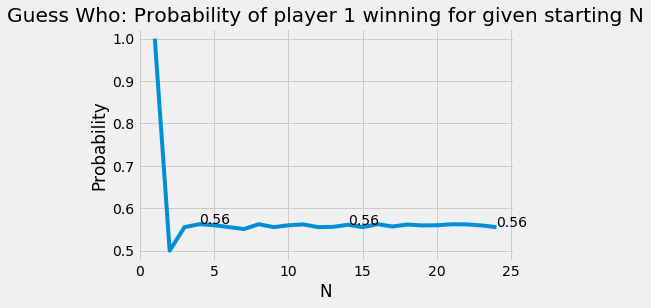

In [2]:
p_N=[GameState(N, N).expected_value() for N in range(1,25)]
N=list(range(1,25))

plt.plot(N,p_N)
plt.xlabel('N')
plt.ylabel('Probability')
plt.title('Guess Who: Probability of player 1 winning for given starting N')
plt.xlim()
specific_points=[4,14,24]
for n in specific_points:
        plt.annotate(round(GameState(n, n).expected_value(),2), (n, p_N[n-1]))

# Find out the probability of player 1 winning from any given game situation

Text(0, 0.5, 'player 1 remaining')

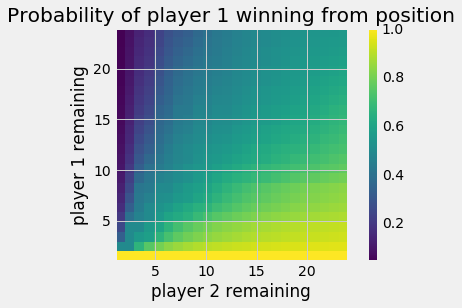

In [3]:
store_scores=np.zeros((24,24))
for i in range(24):
    for j in range(24):
        store_scores[i,j]=GameState(i+1, j+1).expected_value()
plt.imshow(store_scores,origin='lower',extent=[1,24,1,24])
plt.colorbar()
plt.title('Probability of player 1 winning from position')
plt.xlabel('player 2 remaining')
plt.ylabel('player 1 remaining')

# Answers to the questions

## N=4

In [4]:
GameState(4, 4).expected_value()


0.5625

## N=24

In [5]:
GameState(24, 24).expected_value()

0.5555555555555556

## N=14

In [6]:
GameState(14, 14).expected_value()

0.5612244897959183

# Finally we use our additional method to identify the optimal move

In [7]:
GameState(4, 4).optimal_moves()

'ask a 1/3 split question'

In [8]:
GameState(24, 24).optimal_moves()

'ask a 11/13 split question'

In [9]:
GameState(14, 14).optimal_moves()

'ask a 4/10 split question'